In [ ]:
!kaggle datasets download -d paramaggarwal/fashion-product-images-dataset

Dataset URL: https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-dataset
License(s): MIT
 25% 5.70G/23.1G [04:18<13:09, 23.6MB/s]
User cancelled operation


In [ ]:
!unzip -o fashion-product-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: fashion-dataset/styles/58128.json  
  inflating: fashion-dataset/styles/58129.json  
  inflating: fashion-dataset/styles/5813.json  
  inflating: fashion-dataset/styles/58131.json  
  inflating: fashion-dataset/styles/58132.json  
  inflating: fashion-dataset/styles/58133.json  
  inflating: fashion-dataset/styles/58135.json  
  inflating: fashion-dataset/styles/58136.json  
  inflating: fashion-dataset/styles/58137.json  
  inflating: fashion-dataset/styles/58138.json  
  inflating: fashion-dataset/styles/58139.json  
  inflating: fashion-dataset/styles/5814.json  
  inflating: fashion-dataset/styles/58140.json  
  inflating: fashion-dataset/styles/58141.json  
  inflating: fashion-dataset/styles/58143.json  
  inflating: fashion-dataset/styles/58144.json  
  inflating: fashion-dataset/styles/58145.json  
  inflating: fashion-dataset/styles/58146.json  
  inflating: fashion-dataset/styles/58147.json  
  inflating: fashion

Hapus file zip yang sudah di ekstrak

In [ ]:
!rm /content/fashion-product-images-dataset.zip

Hapus file yang duplikat

In [ ]:
!rm -r fashion-dataset/fashion-dataset/

In [ ]:
import pandas as pd
# Load dataset
STYLES_CSV_PATH = "/content/fashion-dataset/styles.csv"
IMAGES_PATH = "/content/fashion-dataset/images"
styles_df = pd.read_csv(STYLES_CSV_PATH, on_bad_lines='skip')


print(styles_df.shape)
styles_df.head()

(44424, 10)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


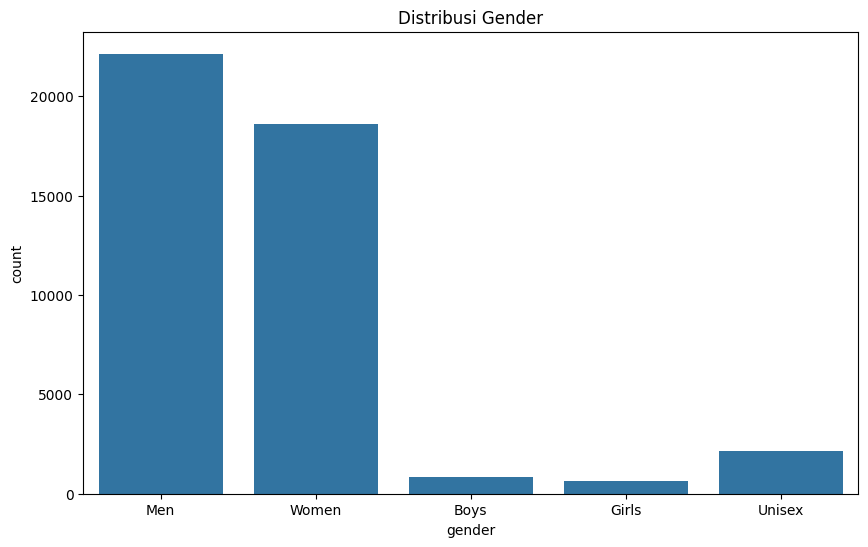

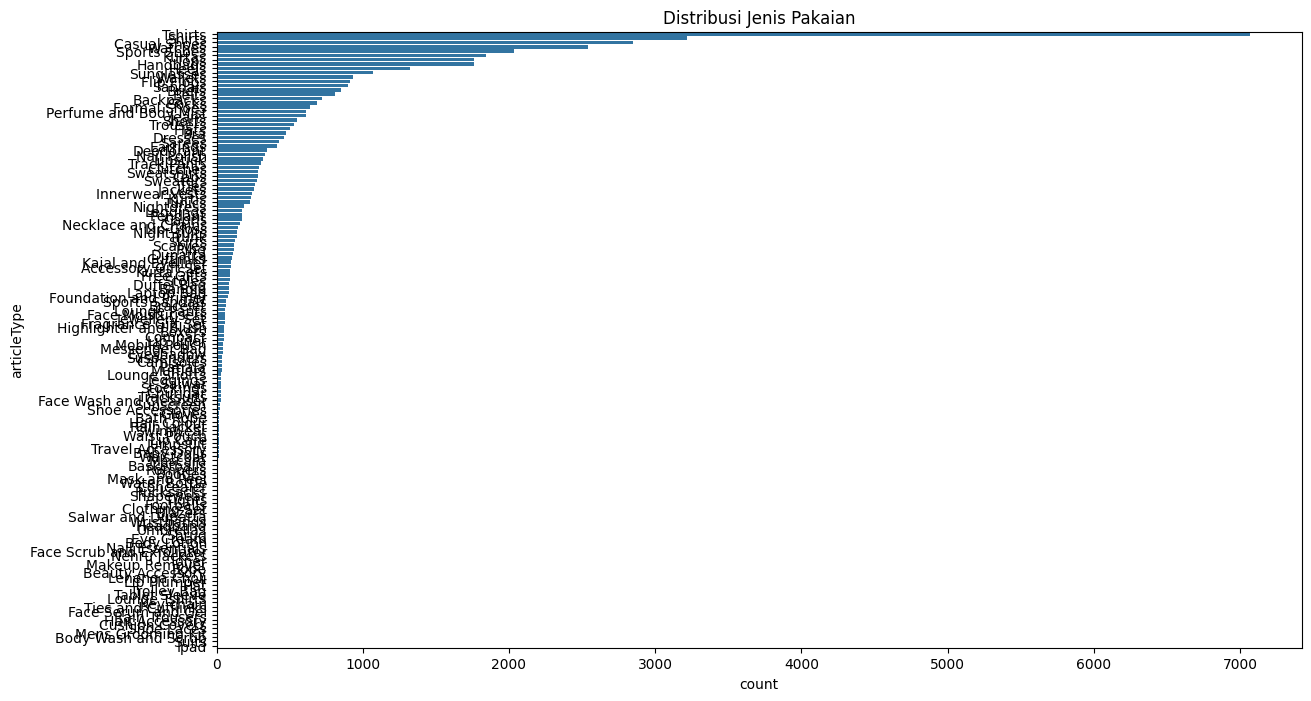

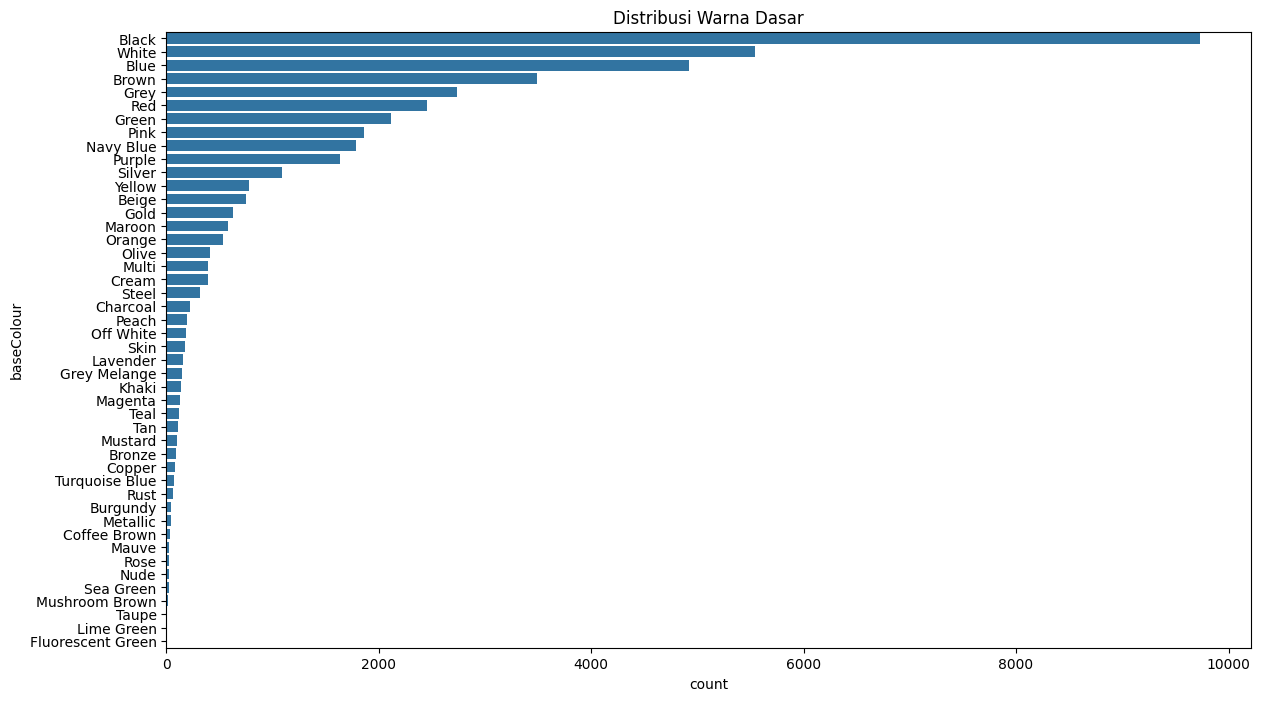

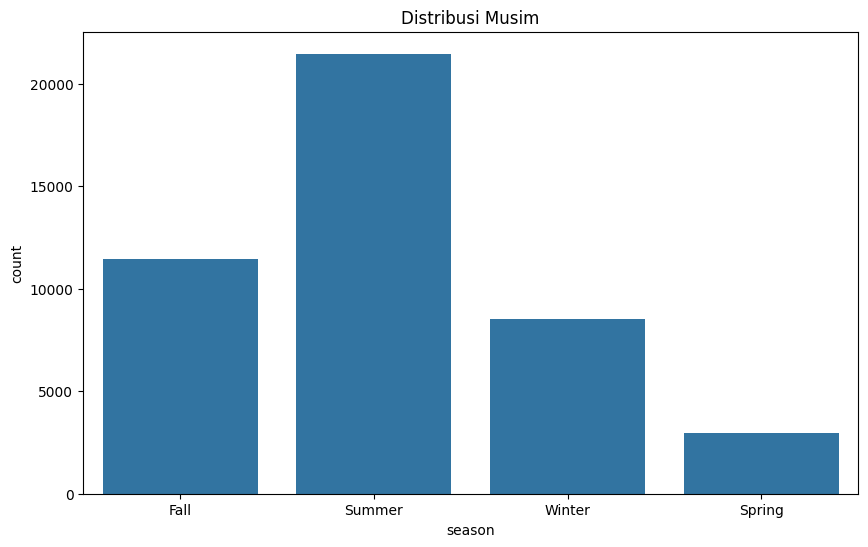

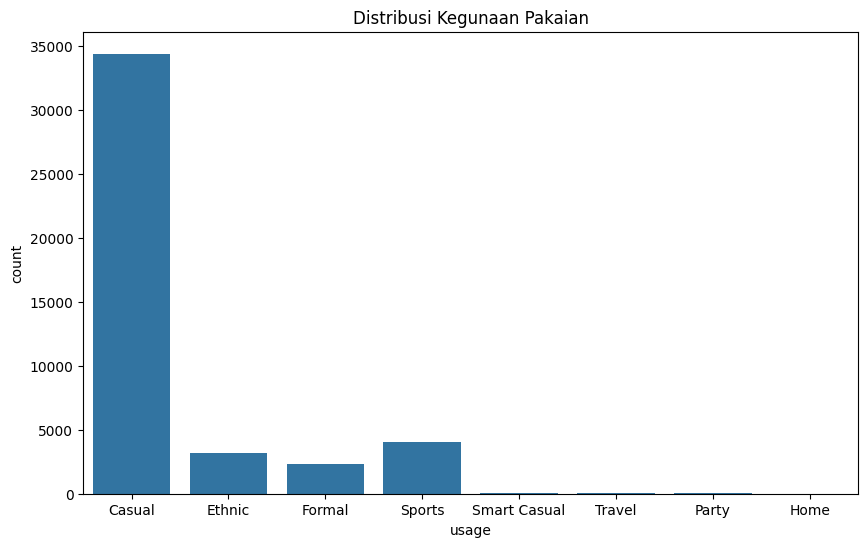

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi gender
plt.figure(figsize=(10, 6))
sns.countplot(data=styles_df, x='gender')
plt.title('Distribusi Gender')
plt.show()

# Visualisasi distribusi artikel jenis
plt.figure(figsize=(14, 8))
sns.countplot(data=styles_df, y='articleType', order=styles_df['articleType'].value_counts().index)
plt.title('Distribusi Jenis Pakaian')
plt.show()

# Visualisasi distribusi warna dasar
plt.figure(figsize=(14, 8))
sns.countplot(data=styles_df, y='baseColour', order=styles_df['baseColour'].value_counts().index)
plt.title('Distribusi Warna Dasar')
plt.show()

# Visualisasi distribusi musim
plt.figure(figsize=(10, 6))
sns.countplot(data=styles_df, x='season')
plt.title('Distribusi Musim')
plt.show()

# Visualisasi distribusi penggunaan
plt.figure(figsize=(10, 6))
sns.countplot(data=styles_df, x='usage')
plt.title('Distribusi Kegunaan Pakaian')
plt.show()


In [ ]:
styles_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [ ]:
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os

# Path ke file styles.csv dan folder images
train_folder = './train/'
valid_folder = './valid/'
test_folder = './test/'

# Buat folder jika belum ada
os.makedirs(train_folder, exist_ok=True)
os.makedirs(valid_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)



In [ ]:


# Preprocessing data
styles_df = styles_df.dropna()

# Filter kategori dan gender yang tidak diperlukan
categories_to_remove = ['Accessories', 'Personal Care', 'Free Items', 'Sporting Goods', 'Home']
styles_df = styles_df[~styles_df['masterCategory'].isin(categories_to_remove)]

gender_to_remove = ['Men', 'Boys', 'Girls']
styles_df = styles_df[~styles_df['gender'].isin(gender_to_remove)]

type_to_remove = ['Bra', 'Kurtas', 'Sarees', 'Kurta Sets', 'Dupatta', 'Bath Robe', 'Night suits', 'Briefs', 'Nightdress', 'Baby Dolls', 'Kurtis', 'Robe', 'Salwar and Dupatta', 'Patiala', 'Churidar', 'Salwar', 'Lehenga Choli']
styles_df = styles_df[~styles_df['articleType'].isin(type_to_remove)]
# Hapus kolom yang tidak diperlukan
columns_to_drop = ['masterCategory', 'subCategory', 'year', 'productDisplayName']
existing_columns = [col for col in columns_to_drop if col in styles_df.columns]
styles_df.drop(columns=existing_columns, inplace=True)




Filtered styles_df categories:
['Women' 'Unisex']
['Shirts' 'Flats' 'Tshirts' 'Heels' 'Tops' 'Sandals' 'Dresses' 'Skirts'
 'Flip Flops' 'Blazers' 'Jeans' 'Sports Shoes' 'Shrug' 'Casual Shoes'
 'Sweatshirts' 'Trousers' 'Shorts' 'Camisoles' 'Tunics' 'Jackets'
 'Lounge Pants' 'Track Pants' 'Capris' 'Swimwear' 'Leggings'
 'Sports Sandals' 'Jumpsuit' 'Stockings' 'Sweaters' 'Tights'
 'Lounge Tshirts' 'Waistcoat' 'Lounge Shorts' 'Shapewear' 'Jeggings'
 'Innerwear Vests' 'Tracksuits' 'Rain Jacket']
['Purple' 'Black' 'Pink' 'Brown' 'Green' 'Off White' 'Blue' 'Navy Blue'
 'Grey' 'Charcoal' 'Red' 'Silver' 'Copper' 'Beige' 'Maroon' 'Lavender'
 'White' 'Cream' 'Gold' 'Yellow' 'Orange' 'Magenta' 'Olive' 'Grey Melange'
 'Multi' 'Teal' 'Rust' 'Turquoise Blue' 'Bronze' 'Peach' 'Taupe' 'Tan'
 'Khaki' 'Mauve' 'Skin' 'Sea Green' 'Coffee Brown' 'Metallic' 'Burgundy'
 'Mustard' 'Mushroom Brown' 'Nude' 'Lime Green']
['Summer' 'Winter' 'Fall' 'Spring']
['Casual' 'Sports' 'Formal' 'Ethnic' 'Smart Casual' 'Part

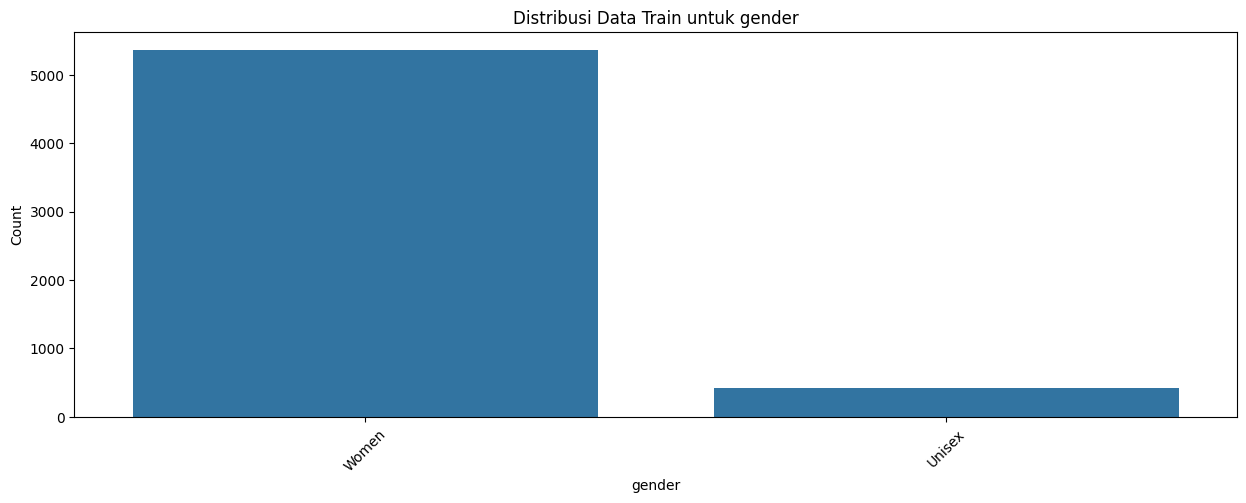

Unique values in 'gender':
['Women' 'Unisex']




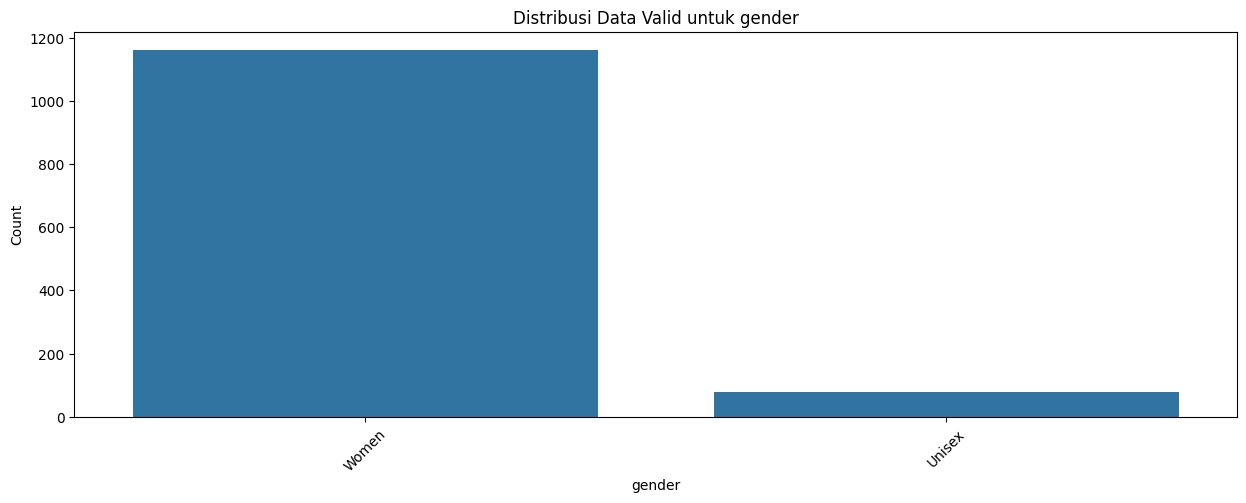

Unique values in 'gender':
['Women' 'Unisex']




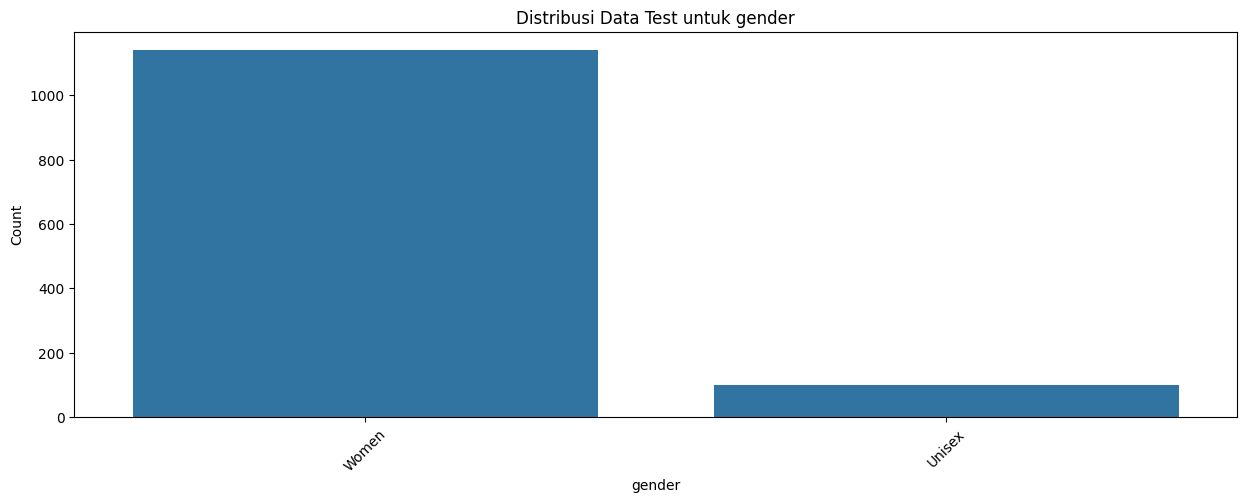

Unique values in 'articleType':
['Tops' 'Tshirts' 'Casual Shoes' 'Flats' 'Skirts' 'Leggings' 'Dresses'
 'Camisoles' 'Heels' 'Jeggings' 'Shirts' 'Sports Shoes' 'Sweaters'
 'Flip Flops' 'Lounge Pants' 'Jackets' 'Capris' 'Tunics' 'Shorts'
 'Trousers' 'Track Pants' 'Shapewear' 'Jeans' 'Stockings' 'Sports Sandals'
 'Lounge Shorts' 'Sandals' 'Tights' 'Sweatshirts' 'Jumpsuit' 'Waistcoat'
 'Swimwear' 'Shrug' 'Blazers' 'Lounge Tshirts' 'Rain Jacket' 'Tracksuits'
 'Innerwear Vests']




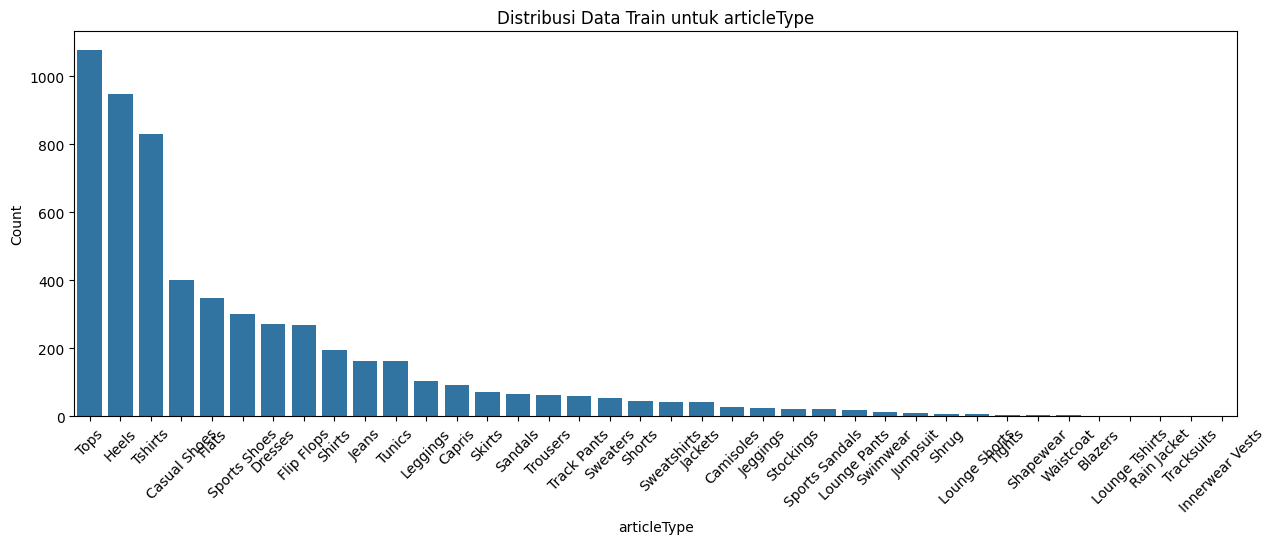

Unique values in 'articleType':
['Sweaters' 'Sports Shoes' 'Heels' 'Shorts' 'Flip Flops' 'Tops' 'Capris'
 'Tunics' 'Dresses' 'Casual Shoes' 'Shirts' 'Tshirts' 'Trousers' 'Flats'
 'Jeans' 'Track Pants' 'Sweatshirts' 'Sports Sandals' 'Sandals' 'Skirts'
 'Lounge Shorts' 'Leggings' 'Jumpsuit' 'Camisoles' 'Shapewear' 'Jackets'
 'Swimwear' 'Jeggings' 'Tights' 'Lounge Pants' 'Stockings'
 'Lounge Tshirts']




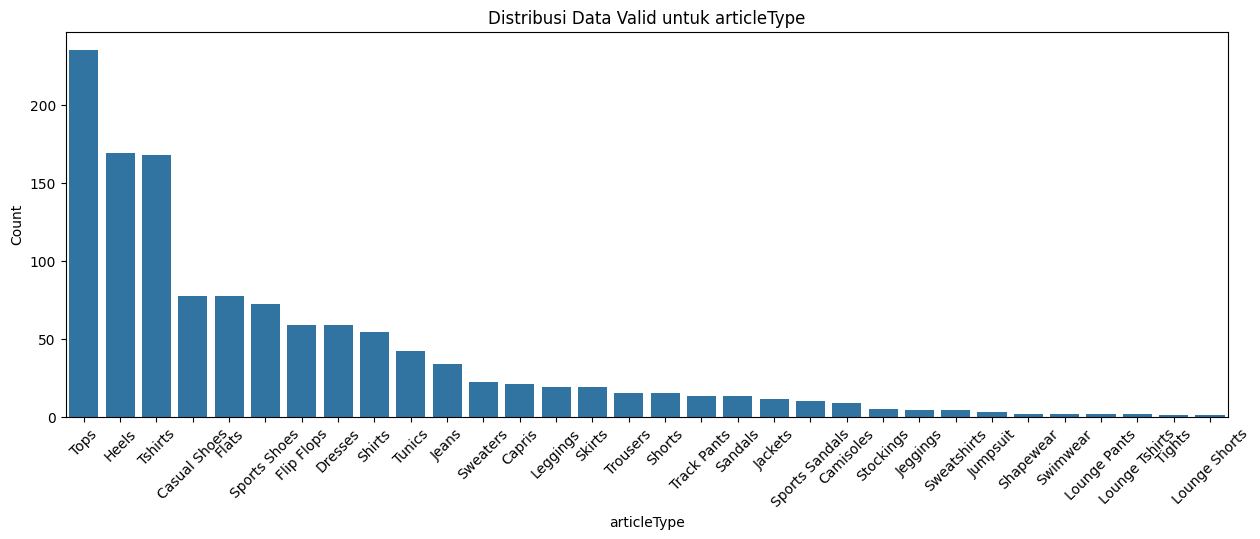

Unique values in 'articleType':
['Flats' 'Tshirts' 'Camisoles' 'Shirts' 'Tops' 'Sweaters' 'Jeans'
 'Flip Flops' 'Sports Shoes' 'Dresses' 'Capris' 'Heels' 'Casual Shoes'
 'Skirts' 'Track Pants' 'Leggings' 'Tunics' 'Sweatshirts' 'Trousers'
 'Blazers' 'Shorts' 'Sandals' 'Shapewear' 'Lounge Pants' 'Swimwear'
 'Jackets' 'Tights' 'Jumpsuit' 'Waistcoat' 'Stockings' 'Sports Sandals'
 'Jeggings' 'Lounge Shorts']




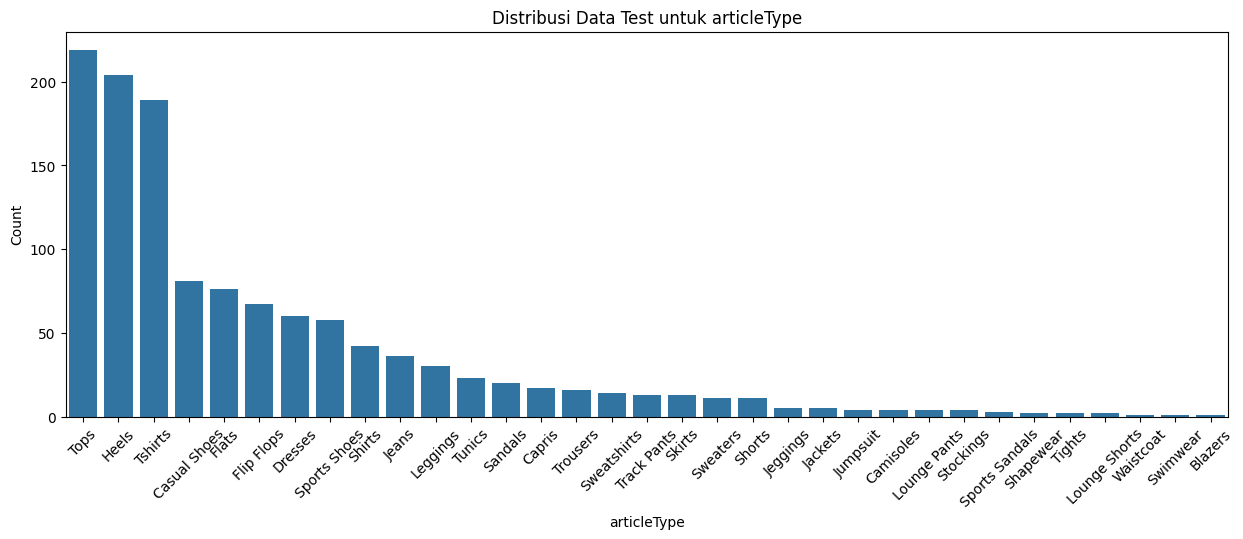

Unique values in 'baseColour':
['Pink' 'Purple' 'Maroon' 'Black' 'Grey' 'Green' 'White' 'Grey Melange'
 'Red' 'Silver' 'Brown' 'Blue' 'Orange' 'Multi' 'Olive' 'Tan' 'Gold'
 'Beige' 'Teal' 'Navy Blue' 'Turquoise Blue' 'Yellow' 'Peach' 'Taupe'
 'Lavender' 'Cream' 'Coffee Brown' 'Bronze' 'Off White' 'Sea Green'
 'Copper' 'Magenta' 'Charcoal' 'Khaki' 'Nude' 'Rust' 'Mustard' 'Metallic'
 'Burgundy' 'Lime Green' 'Skin' 'Mauve']




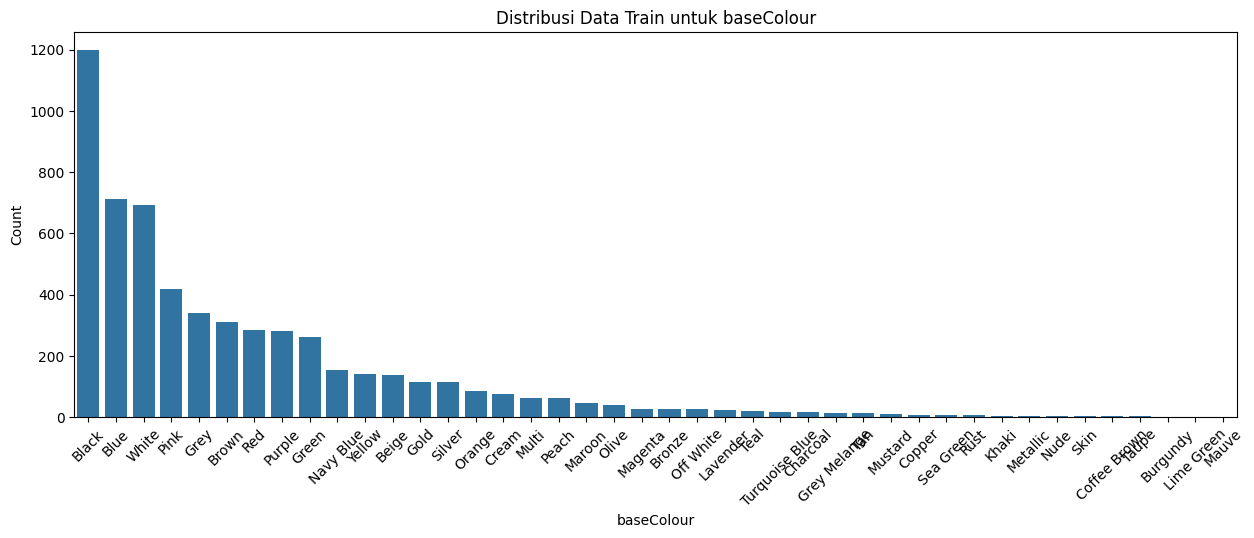

Unique values in 'baseColour':
['Maroon' 'Black' 'White' 'Blue' 'Grey' 'Magenta' 'Pink' 'Multi' 'Green'
 'Yellow' 'Navy Blue' 'Red' 'Purple' 'Lavender' 'Orange' 'Brown' 'Gold'
 'Rust' 'Teal' 'Cream' 'Beige' 'Silver' 'Mauve' 'Bronze' 'Olive'
 'Grey Melange' 'Peach' 'Taupe' 'Tan' 'Lime Green' 'Charcoal' 'Skin'
 'Burgundy' 'Mustard' 'Turquoise Blue' 'Copper' 'Off White'
 'Mushroom Brown']




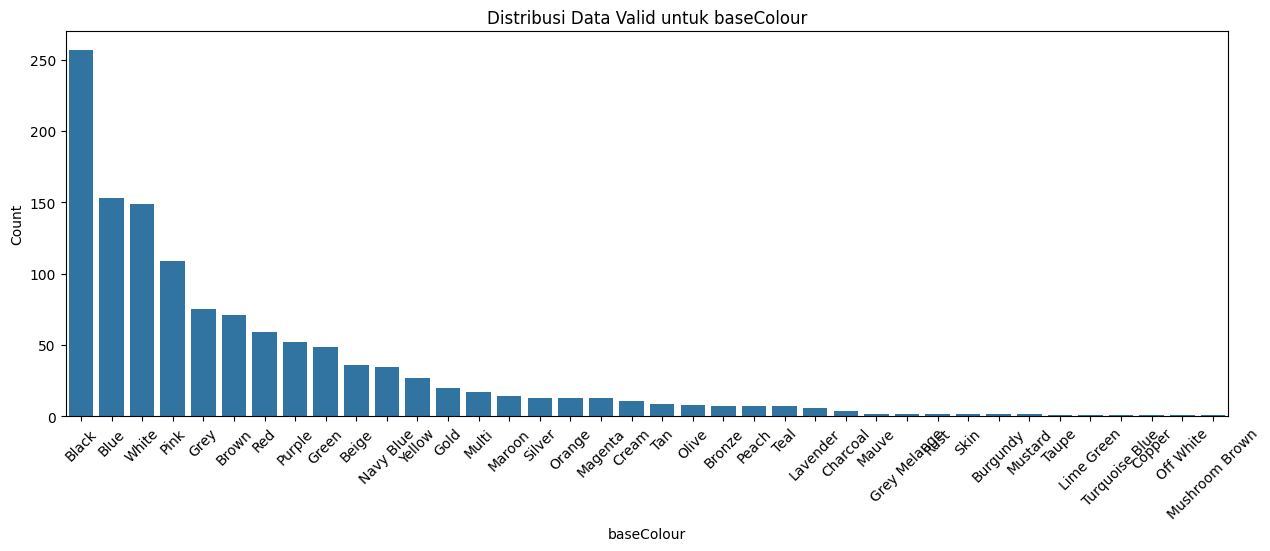

Unique values in 'baseColour':
['Red' 'Purple' 'Black' 'Peach' 'Navy Blue' 'White' 'Blue' 'Gold' 'Brown'
 'Silver' 'Green' 'Pink' 'Beige' 'Yellow' 'Grey' 'Magenta' 'Grey Melange'
 'Bronze' 'Orange' 'Charcoal' 'Mustard' 'Sea Green' 'Multi'
 'Turquoise Blue' 'Maroon' 'Taupe' 'Olive' 'Lavender' 'Tan' 'Mauve' 'Teal'
 'Cream' 'Off White' 'Copper' 'Rust' 'Coffee Brown' 'Metallic']




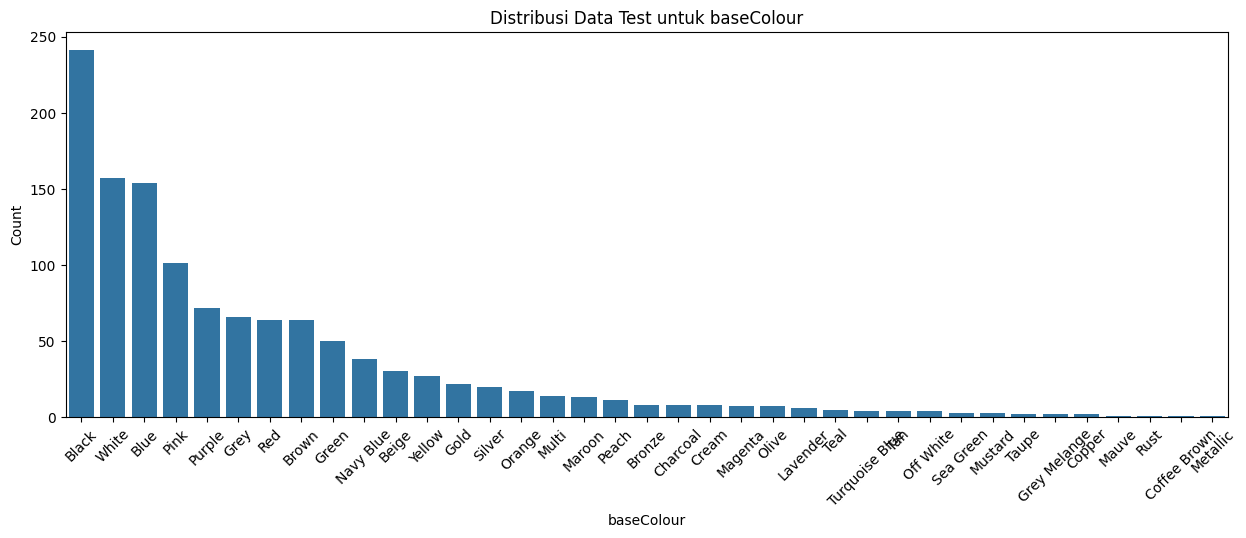

Unique values in 'season':
['Summer' 'Fall' 'Winter' 'Spring']




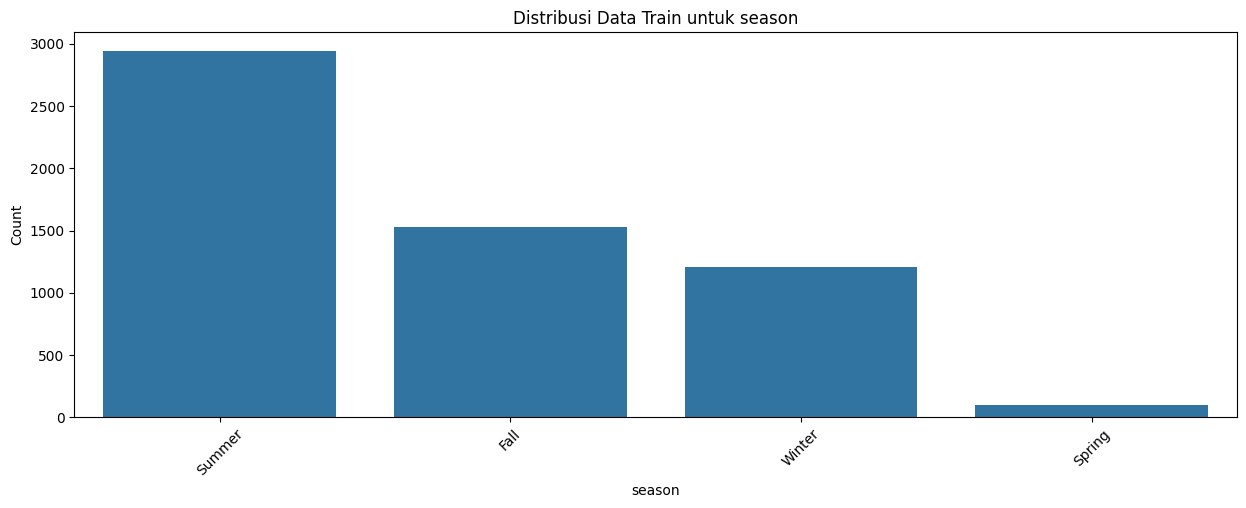

Unique values in 'season':
['Fall' 'Winter' 'Summer' 'Spring']




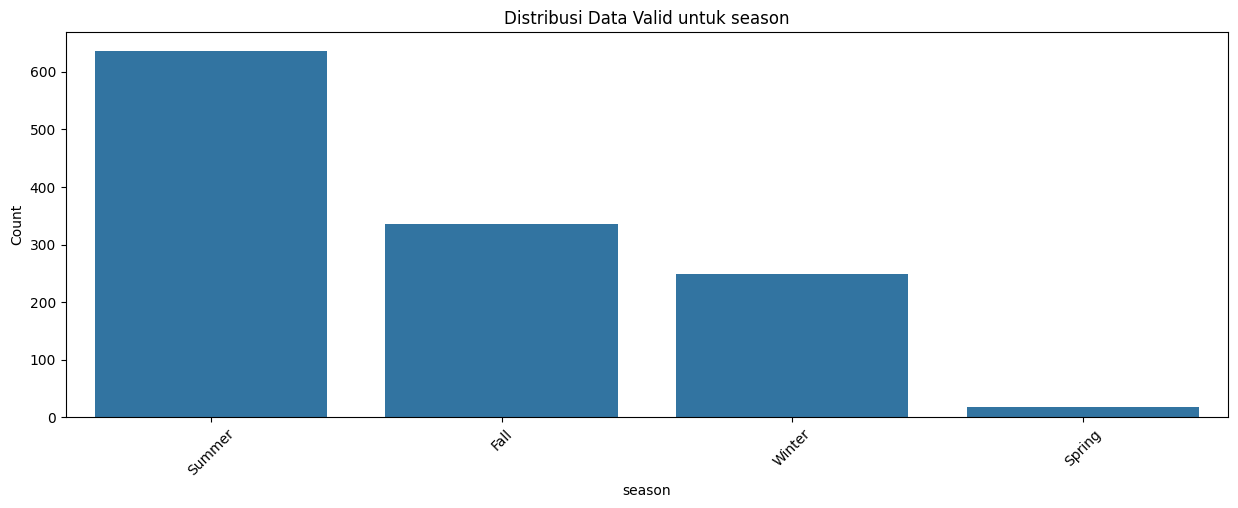

Unique values in 'season':
['Summer' 'Fall' 'Winter' 'Spring']




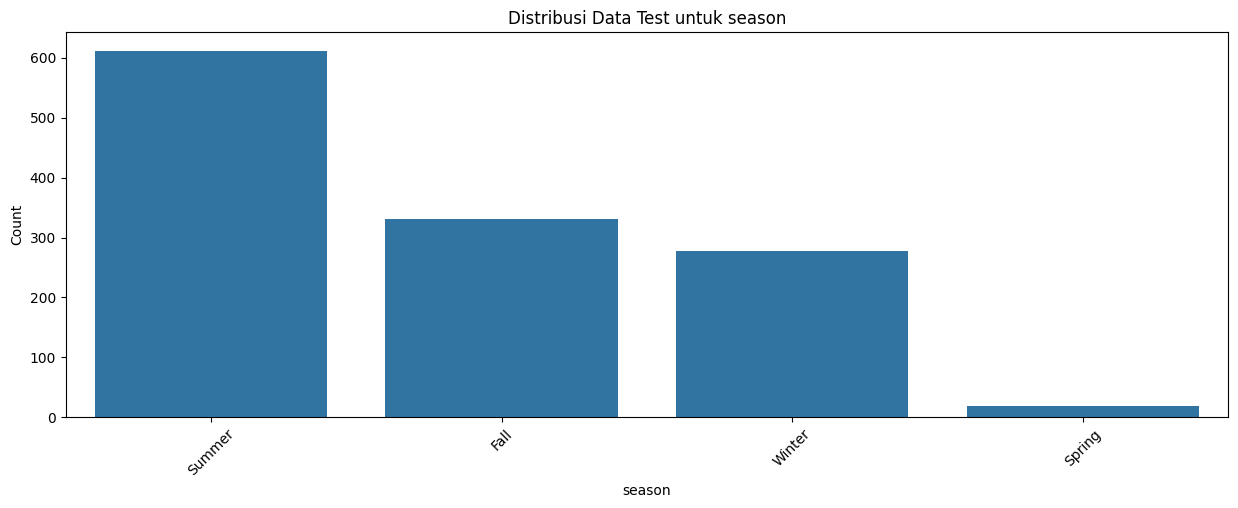

Unique values in 'usage':
['Casual' 'Sports' 'Formal' 'Ethnic' 'Party' 'Smart Casual']




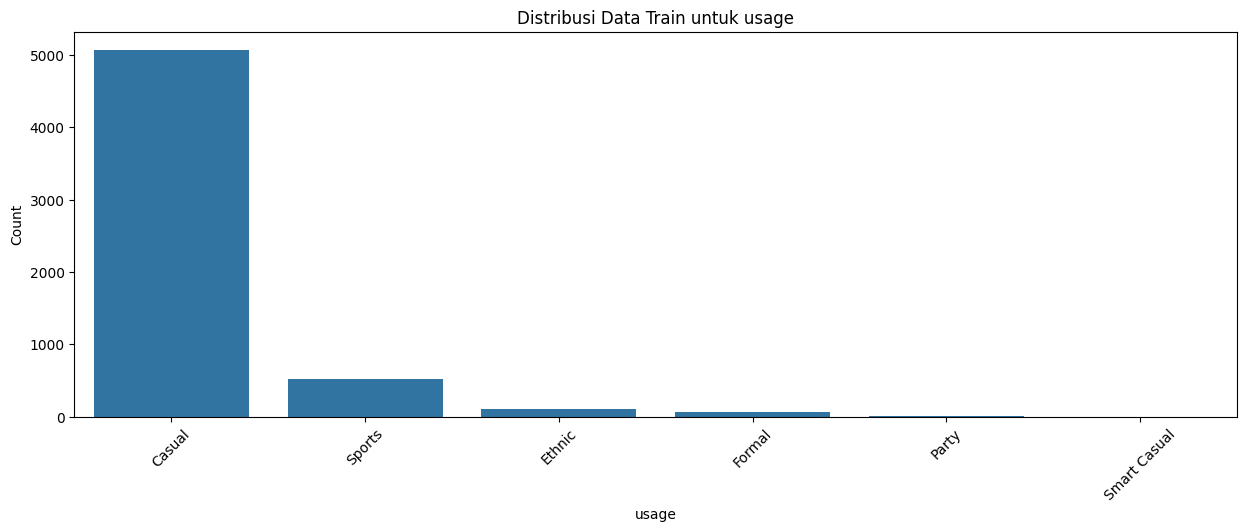

Unique values in 'usage':
['Casual' 'Sports' 'Formal' 'Ethnic' 'Party']




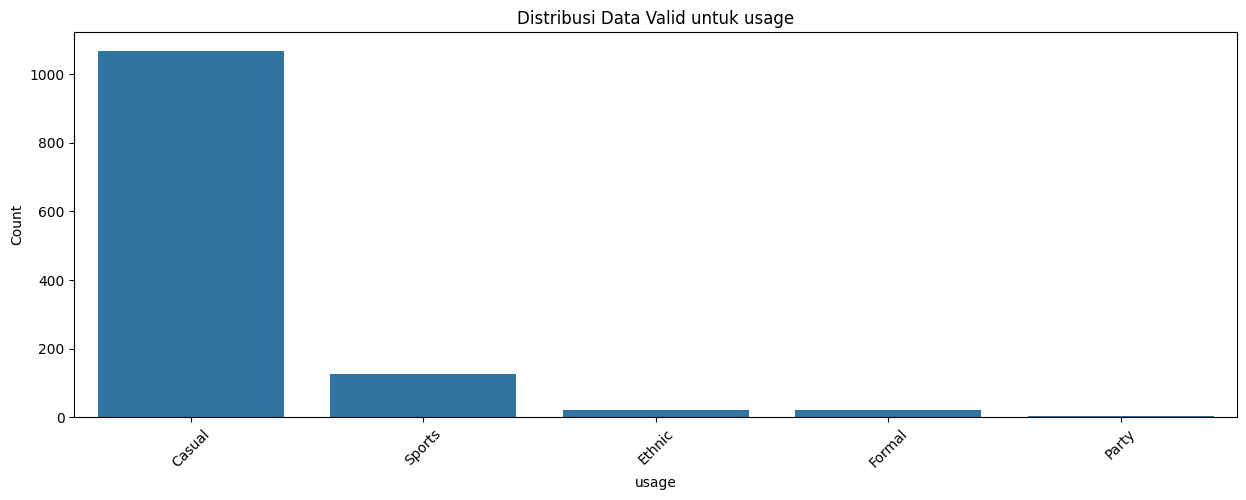

Unique values in 'usage':
['Casual' 'Sports' 'Ethnic' 'Party' 'Formal' 'Smart Casual']




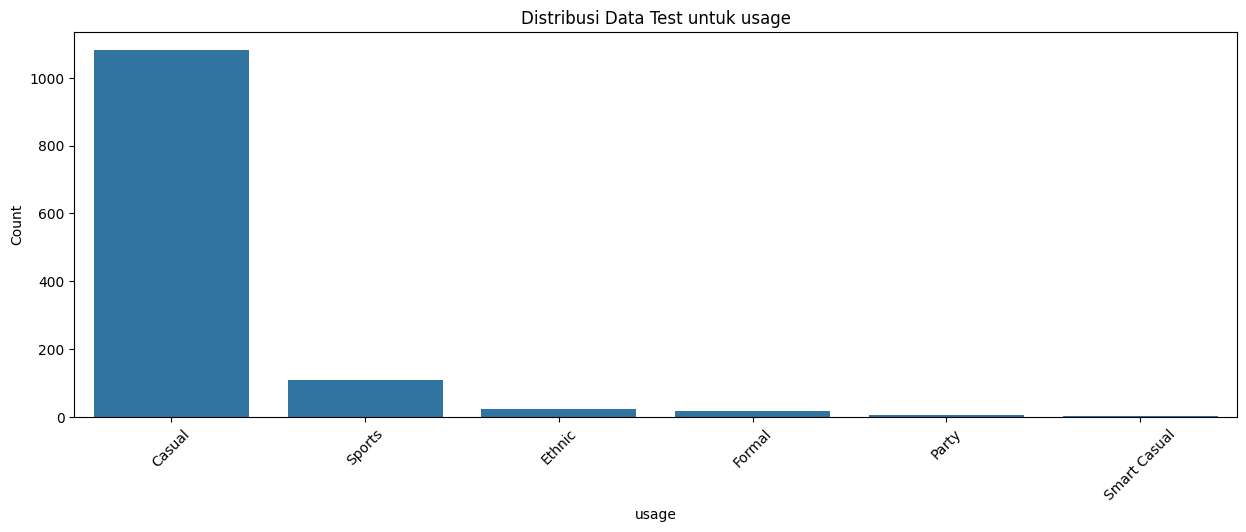

In [ ]:
# Filter styles based on available images
image_ids = set([int(img.split('.')[0]) for img in os.listdir(IMAGES_PATH)])
styles_ids = set(styles_df['id'])
missing_ids = styles_ids - image_ids
styles_df = styles_df[~styles_df['id'].isin(missing_ids)]

print("Filtered styles_df categories:")
print(styles_df['gender'].unique())
print(styles_df['articleType'].unique())
print(styles_df['baseColour'].unique())
print(styles_df['season'].unique())
print(styles_df['usage'].unique())

# Split the cleaned dataframe
train_df, temp_df = train_test_split(styles_df, test_size=0.3, random_state=42)
test_df, val_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Function to copy images to respective folders
def copy_images(df, target_folder):
    for index, row in df.iterrows():
        image_id = row['id']
        source_path = os.path.join(IMAGES_PATH, f"{image_id}.jpg")
        destination_path = os.path.join(target_folder, f"{image_id}.jpg")
        if os.path.exists(source_path):
            shutil.copy(source_path, destination_path)
        else:
            print(f"Image {image_id}.jpg not found in {IMAGES_PATH}")

# Copy images to respective folders
copy_images(train_df, train_folder)
copy_images(val_df, valid_folder)
copy_images(test_df, test_folder)

# Function to visualize data distribution
def visualize_data_distribution(df, column, title):
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print("\n")

    plt.figure(figsize=(15, 5))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Visualize data distribution
for column in ['gender', 'articleType', 'baseColour', 'season', 'usage']:
    visualize_data_distribution(train_df, column, f"Distribusi Data Train untuk {column}")
    visualize_data_distribution(val_df, column, f"Distribusi Data Valid untuk {column}")
    visualize_data_distribution(test_df, column, f"Distribusi Data Test untuk {column}")

In [ ]:
# Fungsi untuk menghitung jumlah kategori
def count_categories(df, column):
    return df[column].value_counts()

# Hitung jumlah kategori untuk setiap subset data
print("Jumlah kategori dalam data train:")
for column in ['gender', 'articleType', 'baseColour', 'season', 'usage']:
    print(f"\n{column}:")
    print(count_categories(train_df, column))

print("\nJumlah kategori dalam data valid:")
for column in ['gender', 'articleType', 'baseColour', 'season', 'usage']:
    print(f"\n{column}:")
    print(count_categories(val_df, column))

print("\nJumlah kategori dalam data test:")
for column in ['gender', 'articleType', 'baseColour', 'season', 'usage']:
    print(f"\n{column}:")
    print(count_categories(test_df, column))

# Menampilkan beberapa baris teratas dari setiap subset data
print("\nData teratas dari data train:")
print(train_df.head())

print("\nData teratas dari data valid:")
print(val_df.head())

print("\nData teratas dari data test:")
print(test_df.head())


Jumlah kategori dalam data train:

gender:
gender
Women     5357
Unisex     420
Name: count, dtype: int64

articleType:
articleType
Tops               1078
Heels               949
Tshirts             830
Casual Shoes        402
Flats               347
Sports Shoes        300
Dresses             271
Flip Flops          269
Shirts              195
Jeans               163
Tunics              163
Leggings            104
Capris               91
Skirts               72
Sandals              65
Trousers             64
Track Pants          61
Sweaters             55
Shorts               44
Sweatshirts          42
Jackets              41
Camisoles            26
Jeggings             25
Stockings            23
Sports Sandals       23
Lounge Pants         20
Swimwear             14
Jumpsuit              9
Shrug                 6
Lounge Shorts         6
Tights                5
Shapewear             5
Waistcoat             4
Blazers               1
Lounge Tshirts        1
Rain Jacket           1
Trac

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import os

# Menambahkan kolom id jika belum ada
if 'id' not in styles_df.columns:
    styles_df['id'] = styles_df.index.astype(str)

# One-Hot Encoding untuk fitur kategorikal
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(styles_df[['usage']])

# Menyusun fitur dan label
X = encoded_features
y = styles_df[['id', 'usage']]

# Membagi data menjadi train, validation, dan test dengan rasio 70:15:15
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
# Menyusun dataframe untuk ImageDataGenerator
train_df = y_train.copy()
val_df = y_val.copy()
test_df = y_test.copy()

# Menambahkan kolom id jika belum ada
if 'id' not in styles_df.columns:
    styles_df['id'] = styles_df.index

# Konversi nilai 'id' menjadi string dengan ekstensi '.jpg'
train_df['id'] = train_df['id'].astype(str) + '.jpg' # Update this line if necessary
val_df['id'] = val_df['id'].astype(str) + '.jpg' # Update this line if necessary
test_df['id'] = test_df['id'].astype(str) + '.jpg' # Update this line if necessary


# Memastikan file gambar ada di direktori yang benar
image_directory = '/content/fashion-dataset/images'
train_df = train_df[train_df['id'].apply(lambda x: os.path.exists(os.path.join(image_directory, x)))]
val_df = val_df[val_df['id'].apply(lambda x: os.path.exists(os.path.join(image_directory, x)))]
test_df = test_df[test_df['id'].apply(lambda x: os.path.exists(os.path.join(image_directory, x)))]

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode categorical labels to integers
label_encoder = LabelEncoder()

# Ubah tipe data kolom label menjadi numerik
for col in ['usage']:
    train_df[col] = label_encoder.fit_transform(train_df[col])
    val_df[col] = label_encoder.fit_transform(val_df[col])
    test_df[col] = label_encoder.fit_transform(test_df[col])

print(train_df.dtypes)  # Pastikan semua kolom label sudah bukan object lagi
print(val_df.dtypes)
print(test_df.dtypes)


id       object
usage     int64
dtype: object
id       object
usage     int64
dtype: object
id       object
usage     int64
dtype: object


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for col in ['gender', 'articleType', 'baseColour', 'season', 'usage']:
    # Check if the dataframe is empty
    if not train_df.empty:
        train_df[col] = scaler.fit_transform(train_df[[col]])
    if not val_df.empty:
        val_df[col] = scaler.fit_transform(val_df[[col]])
    if not test_df.empty:
        test_df[col] = scaler.fit_transform(test_df[[col]])

KeyError: "None of [Index(['gender'], dtype='object')] are in the [columns]"

In [ ]:
# Sel 33 - Ubah untuk memeriksa keberadaan direktori gambar atau ketidakcocokan nama file
# Menyusun dataframe untuk ImageDataGenerator
train_df = y_train.copy()
val_df = y_val.copy()
test_df = y_test.copy()

# Menambahkan kolom id jika belum ada
if 'id' not in styles_df.columns:
    styles_df['id'] = styles_df.index

# Konversi nilai 'id' menjadi string dengan ekstensi '.jpg'
train_df['id'] = train_df['id'].astype(str) + '.jpg'
val_df['id'] = val_df['id'].astype(str) + '.jpg'
test_df['id'] = test_df['id'].astype(str) + '.jpg'

# Memastikan file gambar ada di direktori yang benar
image_directory = '/content/fashion-dataset/images' # Perbarui jika gambar Anda berada di folder yang berbeda

# Periksa apakah image_directory ada
if not os.path.exists(image_directory):
    print(f"Error: Direktori gambar '{image_directory}' tidak ditemukan.")
else:
    # Filter dataframe untuk menyertakan hanya file gambar yang ada
    train_df = train_df[train_df['id'].apply(lambda x: os.path.exists(os.path.join(image_directory, x)))]
    val_df = val_df[val_df['id'].apply(lambda x: os.path.exists(os.path.join(image_directory, x)))]
    test_df = test_df[test_df['id'].apply(lambda x: os.path.exists(os.path.join(image_directory, x)))]

    # Periksa apakah dataframe kosong setelah difilter
    if train_df.empty or val_df.empty or test_df.empty:
        print("Error: Dataframe kosong setelah difilter. Periksa nama file gambar dan nilai 'id'.")

In [ ]:
print(train_df['usage'].value_counts())



usage
Casual          5063
Sports           529
Ethnic           102
Formal            66
Party             13
Smart Casual       4
Name: count, dtype: int64


In [ ]:

# Encode categorical labels to integers
label_encoder = LabelEncoder()

# Ubah tipe data kolom label menjadi numerik
for col in ['usage']:
    train_df[col] = label_encoder.fit_transform(train_df[col])
    val_df[col] = label_encoder.transform(val_df[col]) # Use transform instead of fit_transform
    test_df[col] = label_encoder.transform(test_df[col]) # Use transform instead of fit_transform

# Convert the integer labels back to strings using the inverse_transform
train_df['usage'] = label_encoder.inverse_transform(train_df['usage'])
val_df['usage'] = label_encoder.inverse_transform(val_df['usage'])
test_df['usage'] = label_encoder.inverse_transform(test_df['usage'])

print(train_df.dtypes)  # Pastikan semua kolom label sudah bukan object lagi
print(val_df.dtypes)
test_df.dtypes

# ... (rest of the code)

id       object
usage    object
dtype: object
id       object
usage    object
dtype: object


,0
id,object
usage,object


In [ ]:
# prompt: tampilkan seluruh label yang ada di articletype

print(styles_df['usage'].unique())

['Casual' 'Sports' 'Formal' 'Ethnic' 'Smart Casual' 'Party']


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import SparseCategoricalCrossentropy # Diganti dengan SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input
from sklearn.preprocessing import LabelEncoder

# Menggunakan model pre-trained dari tf.keras.applications
base_model = EfficientNetB0(include_top=False, input_shape=(128, 128, 3), weights='imagenet')

# Membekukan sebagian besar layer dari base model
base_model.trainable = True
for layer in base_model.layers[:-10]:
    layer.trainable = False

label_encoder = LabelEncoder()
for col in ['usage']: # Hanya encode kolom 'usage'
    train_df[col] = label_encoder.fit_transform(train_df[col])
    val_df[col] = label_encoder.transform(val_df[col]) # Gunakan transform, bukan fit_transform
    test_df[col] = label_encoder.transform(test_df[col]) # Gunakan transform, bukan fit_transform

# Menggunakan ImageDataGenerator dengan augmentasi data
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fungsi untuk membuat data generator
def create_generator(dataframe, batch_size=64):
    return datagen.flow_from_dataframe(
        dataframe=dataframe,
        directory="/content/fashion-dataset/images",
        x_col='id',
        y_col=['usage'],  # Kolom label yang diperbarui
        target_size=(128, 128),
        batch_size=batch_size,
        class_mode='raw',
        shuffle=True
    )

# Generator data untuk set pelatihan, validasi, dan pengujian
train_generator = create_generator(train_df)
val_generator = create_generator(val_df)
test_generator = create_generator(test_df, batch_size=1)

# Definisikan model dengan API Functional Keras
inputs = tf.keras.Input(shape=(128, 128, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
num_article_types = len(styles_df['usage'].unique())  # Get the number of unique article types
outputs = tf.keras.layers.Dense(num_article_types, activation='softmax')(x)  # Output layer for 'articleType'
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Gunakan BinaryCrossentropy tanpa from_logits=True
loss_fn = SparseCategoricalCrossentropy(from_logits=False)

# Mengompilasi model dengan learning rate lebih kecil
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss=loss_fn, metrics=['accuracy'])

# Menggunakan early stopping dan ReduceLROnPlateau untuk menghindari overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Melatih model menggunakan generator dengan early stopping dan ReduceLROnPlateau
history = model.fit(train_generator, epochs=25, validation_data=val_generator, callbacks=[early_stopping, reduce_lr])

# Evaluasi model
model.evaluate(test_generator)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 5777 validated image filenames.
Found 1238 validated image filenames.
Found 1239 validated image filenames.
Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


91/91 ━━━━━━━━━━━━━━━━━━━━ 430s 4s/step - accuracy: 0.1774 - loss: 2.9906 - val_accuracy: 0.0985 - val_loss: 1.9403 - learning_rate: 1.0000e-04
Epoch 2/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 426s 4s/step - accuracy: 0.2249 - loss: 2.6173 - val_accuracy: 0.1939 - val_loss: 1.8861 - learning_rate: 1.0000e-04
Epoch 3/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 446s 4s/step - accuracy: 0.2777 - loss: 2.3564 - val_accuracy: 0.4564 - val_loss: 1.6331 - learning_rate: 1.0000e-04
Epoch 4/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 438s 4s/step - accuracy: 0.3092 - loss: 2.2252 - val_accuracy: 0.6115 - val_loss: 1.4499 - learning_rate: 1.0000e-04
Epoch 5/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 390s 4s/step - accuracy: 0.3659 - loss: 2.0011 - val_accuracy: 0.7326 - val_loss: 1.2952 - learning_rate: 1.0000e-04
Epoch 6/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 461s 4s/step - accuracy: 0.4105 - loss: 1.8567 - val_accuracy: 0.7884 - val_loss: 1.2165 - learning_rate: 1.0000e-04
Epoch 7/25
91/91 ━━━━━━━━━━━━━━━━━━━━ 387s 4s/step - accuracy: 0.4708 - loss: 1.7

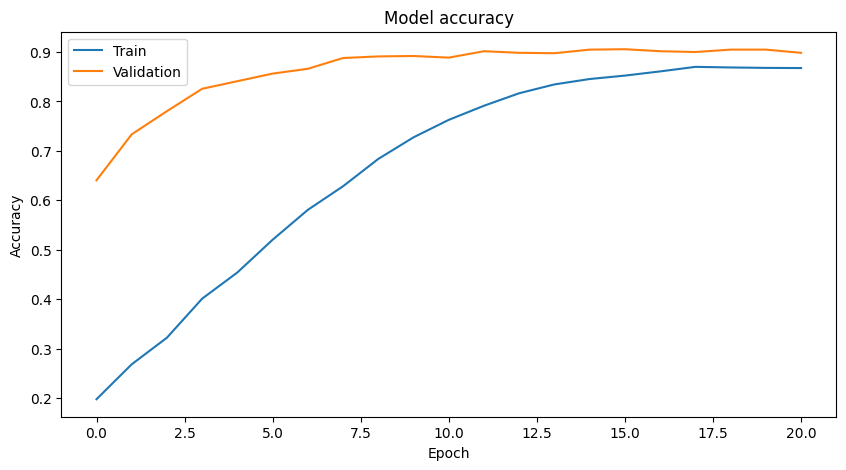

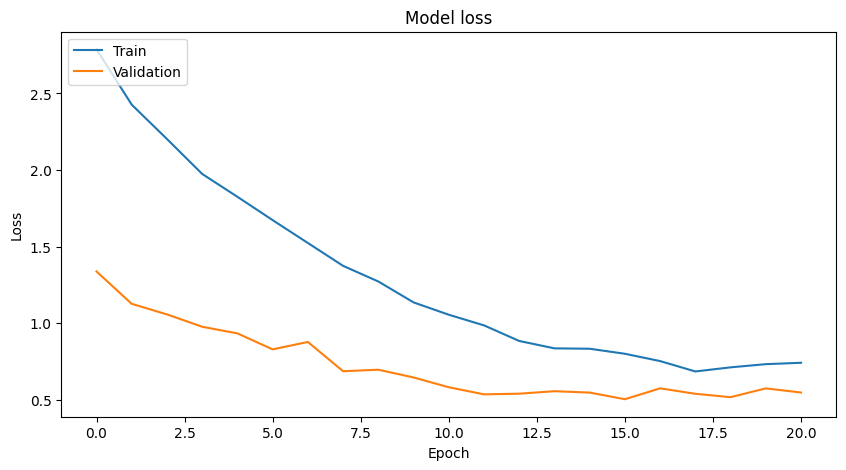

In [ ]:
# prompt: buatlah grafik untuk training and validity accuracy dan lossnya

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:

# Make predictions on the test set
predictions = model.predict(test_generator)

# Get the predicted class labels
predicted_labels = predictions.argmax(axis=1)

# Get the true class labels
true_labels = test_generator.labels

# Inverse transform the predicted and true labels back to their original string representation
predicted_labels_str = label_encoder.inverse_transform(predicted_labels)
true_labels_str = label_encoder.inverse_transform(true_labels)


# Create a DataFrame with the predicted and actual labels
results_df = pd.DataFrame({'Predicted': predicted_labels_str, 'Actual': true_labels_str})
print(results_df.head(20))

# You can further analyze the results_df, such as calculating accuracy, confusion matrix etc.

1239/1239 ━━━━━━━━━━━━━━━━━━━━ 43s 30ms/step
    Predicted  Actual
0           0       0
1           0       5
2           0       0
3           0       0
4           0       0
5           0       0
6           0       0
7           0       5
8           0       5
9           0       0
10          0       0
11          5       0
12          0       0
13          0       0
14          0       0
15          0       0
16          0       0
17          0       0
18          0       0
19          0       0


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1239/1239 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step
Confusion Matrix for usage:


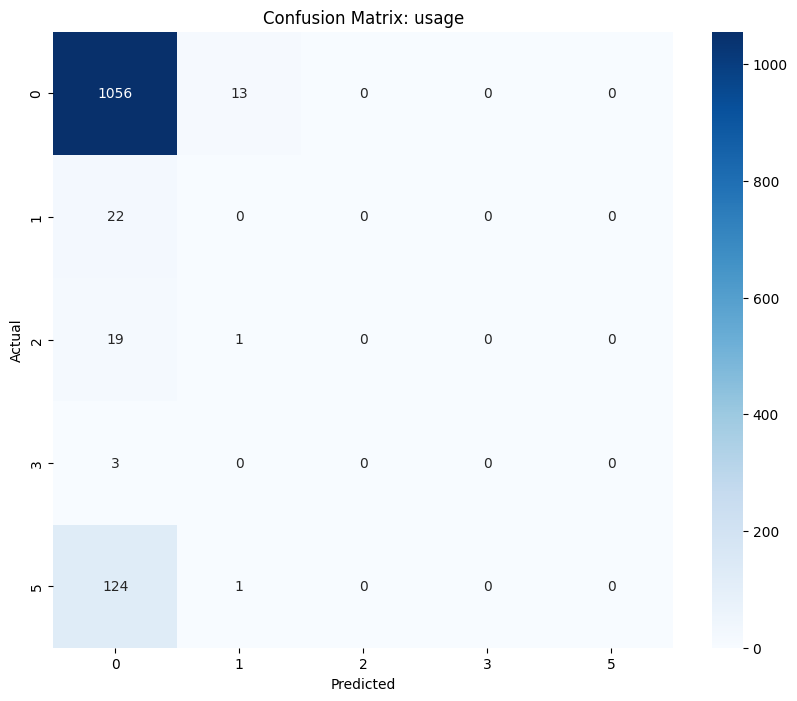

Akurasi untuk usage: 85.23%
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1069
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00       125

    accuracy                           0.85      1239
   macro avg       0.17      0.20      0.18      1239
weighted avg       0.74      0.85      0.79      1239

Akurasi Keseluruhan: 74.66%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Membuat prediksi dan mengubahnya menjadi label
import numpy as np
y_pred = model.predict(test_generator)
y_pred_labels = np.round(y_pred).astype(int)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title):
    labels = np.unique(np.concatenate((y_true, y_pred)))
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {title}')
    plt.show()


# Definisikan label encoder sesuai dengan data asli
labels = {
    'usage': ['Casual', 'Ethnic', 'Sports', 'Formal', 'Smart Casual', 'Party']
}

# Plot confusion matrix dan menghitung akurasi untuk setiap atribut
for i, col in enumerate(['usage']):
    y_true_col = test_df[col].values.astype(int)  # Ubah tipe data y_true_col
    y_pred_col = y_pred_labels[:, i]
    print(f"Confusion Matrix for {col}:")
    plot_confusion_matrix(y_true_col, y_pred_col, col)

    # Menghitung akurasi
    accuracy = accuracy_score(y_true_col, y_pred_col)
    print(f"Akurasi untuk {col}: {accuracy * 100:.2f}%")

    # Mengonversi target names ke string
    target_names = [str(label) for label in np.unique(y_true_col)]
    print(classification_report(y_true_col, y_pred_col, target_names=target_names))

# Menghitung akurasi keseluruhan
overall_accuracy = np.mean(np.all(test_df[['usage']].values.astype(int) == y_pred_labels, axis=1))
print(f"Akurasi Keseluruhan: {overall_accuracy * 100:.2f}%")


In [ ]:
model.save("model-usage.h5")


In [ ]:
# model.save("model.keras")
model = tf.keras.models.load_model("model-usage.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
